# 결정트리


## 공통

In [1]:
%config InlineBackend.figure_format = "retina"
%config InlineBackend.figure_formats = ["pdf", "svg"]

In [2]:
from preamble import * 

## 연습문제 01

### 연습문제01. load_iris 데이터를 로드하고, 데이터를 탐색하세요.
- 데이터셋의 특성과 타깃(target)의 개수를 확인하세요.
- 각 특성의 기초 통계 정보를 출력하세요.

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
print(f"target 갯수 : {iris.target.shape}")

target 갯수 : (150,)


### 연습문제01-2. 데이터를 학습 데이터와 테스트 데이터로 나누세요.
- 학습 데이터와 테스트 데이터의 크기를 출력하세요.
    - 데이터 분할은 train_test_split 함수를 사용하세요.
    - 학습 데이터와 테스트 데이터의 비율은 80:20으로 설정하세요.

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    test_size=0.2,
                                                    random_state=42)

In [6]:
iris.data.shape

(150, 4)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

### 연습문제01-3. DecisionTreeClassifier를 사용하여 모델을 생성하세요.
- 학습 데이터를 사용하여 모델을 학습시키세요.
- 학습 완료 후, 학습 데이터에 대한 정확도를 출력하세요

In [8]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print(f"훈련 정확도 : {dt.score(X_train, y_train)}")       #훈련 정확도

훈련 정확도 : 1.0


### 연습문제04. 학습된 모델을 사용하여 테스트 데이터를 예측하세요.
- 테스트 데이터에 대한 정확도를 출력하세요.
- classification_report를 사용하여 평가 결과를 상세히 출력하세요.

In [ ]:
from sklearn.metrics import classification_report

print(f"테스트 정확도: {dt.score(X_test, y_test)}")         #테스트 정확도

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

테스트 정확도: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 연습문제05. 학습된 결정 트리를 시각화하세요.
- plot_tree 함수를 사용하여 결정 트리의 구조를 그리세요.
- 트리 시각화를 통해 어떤 특성이 중요한지 설명하세요.

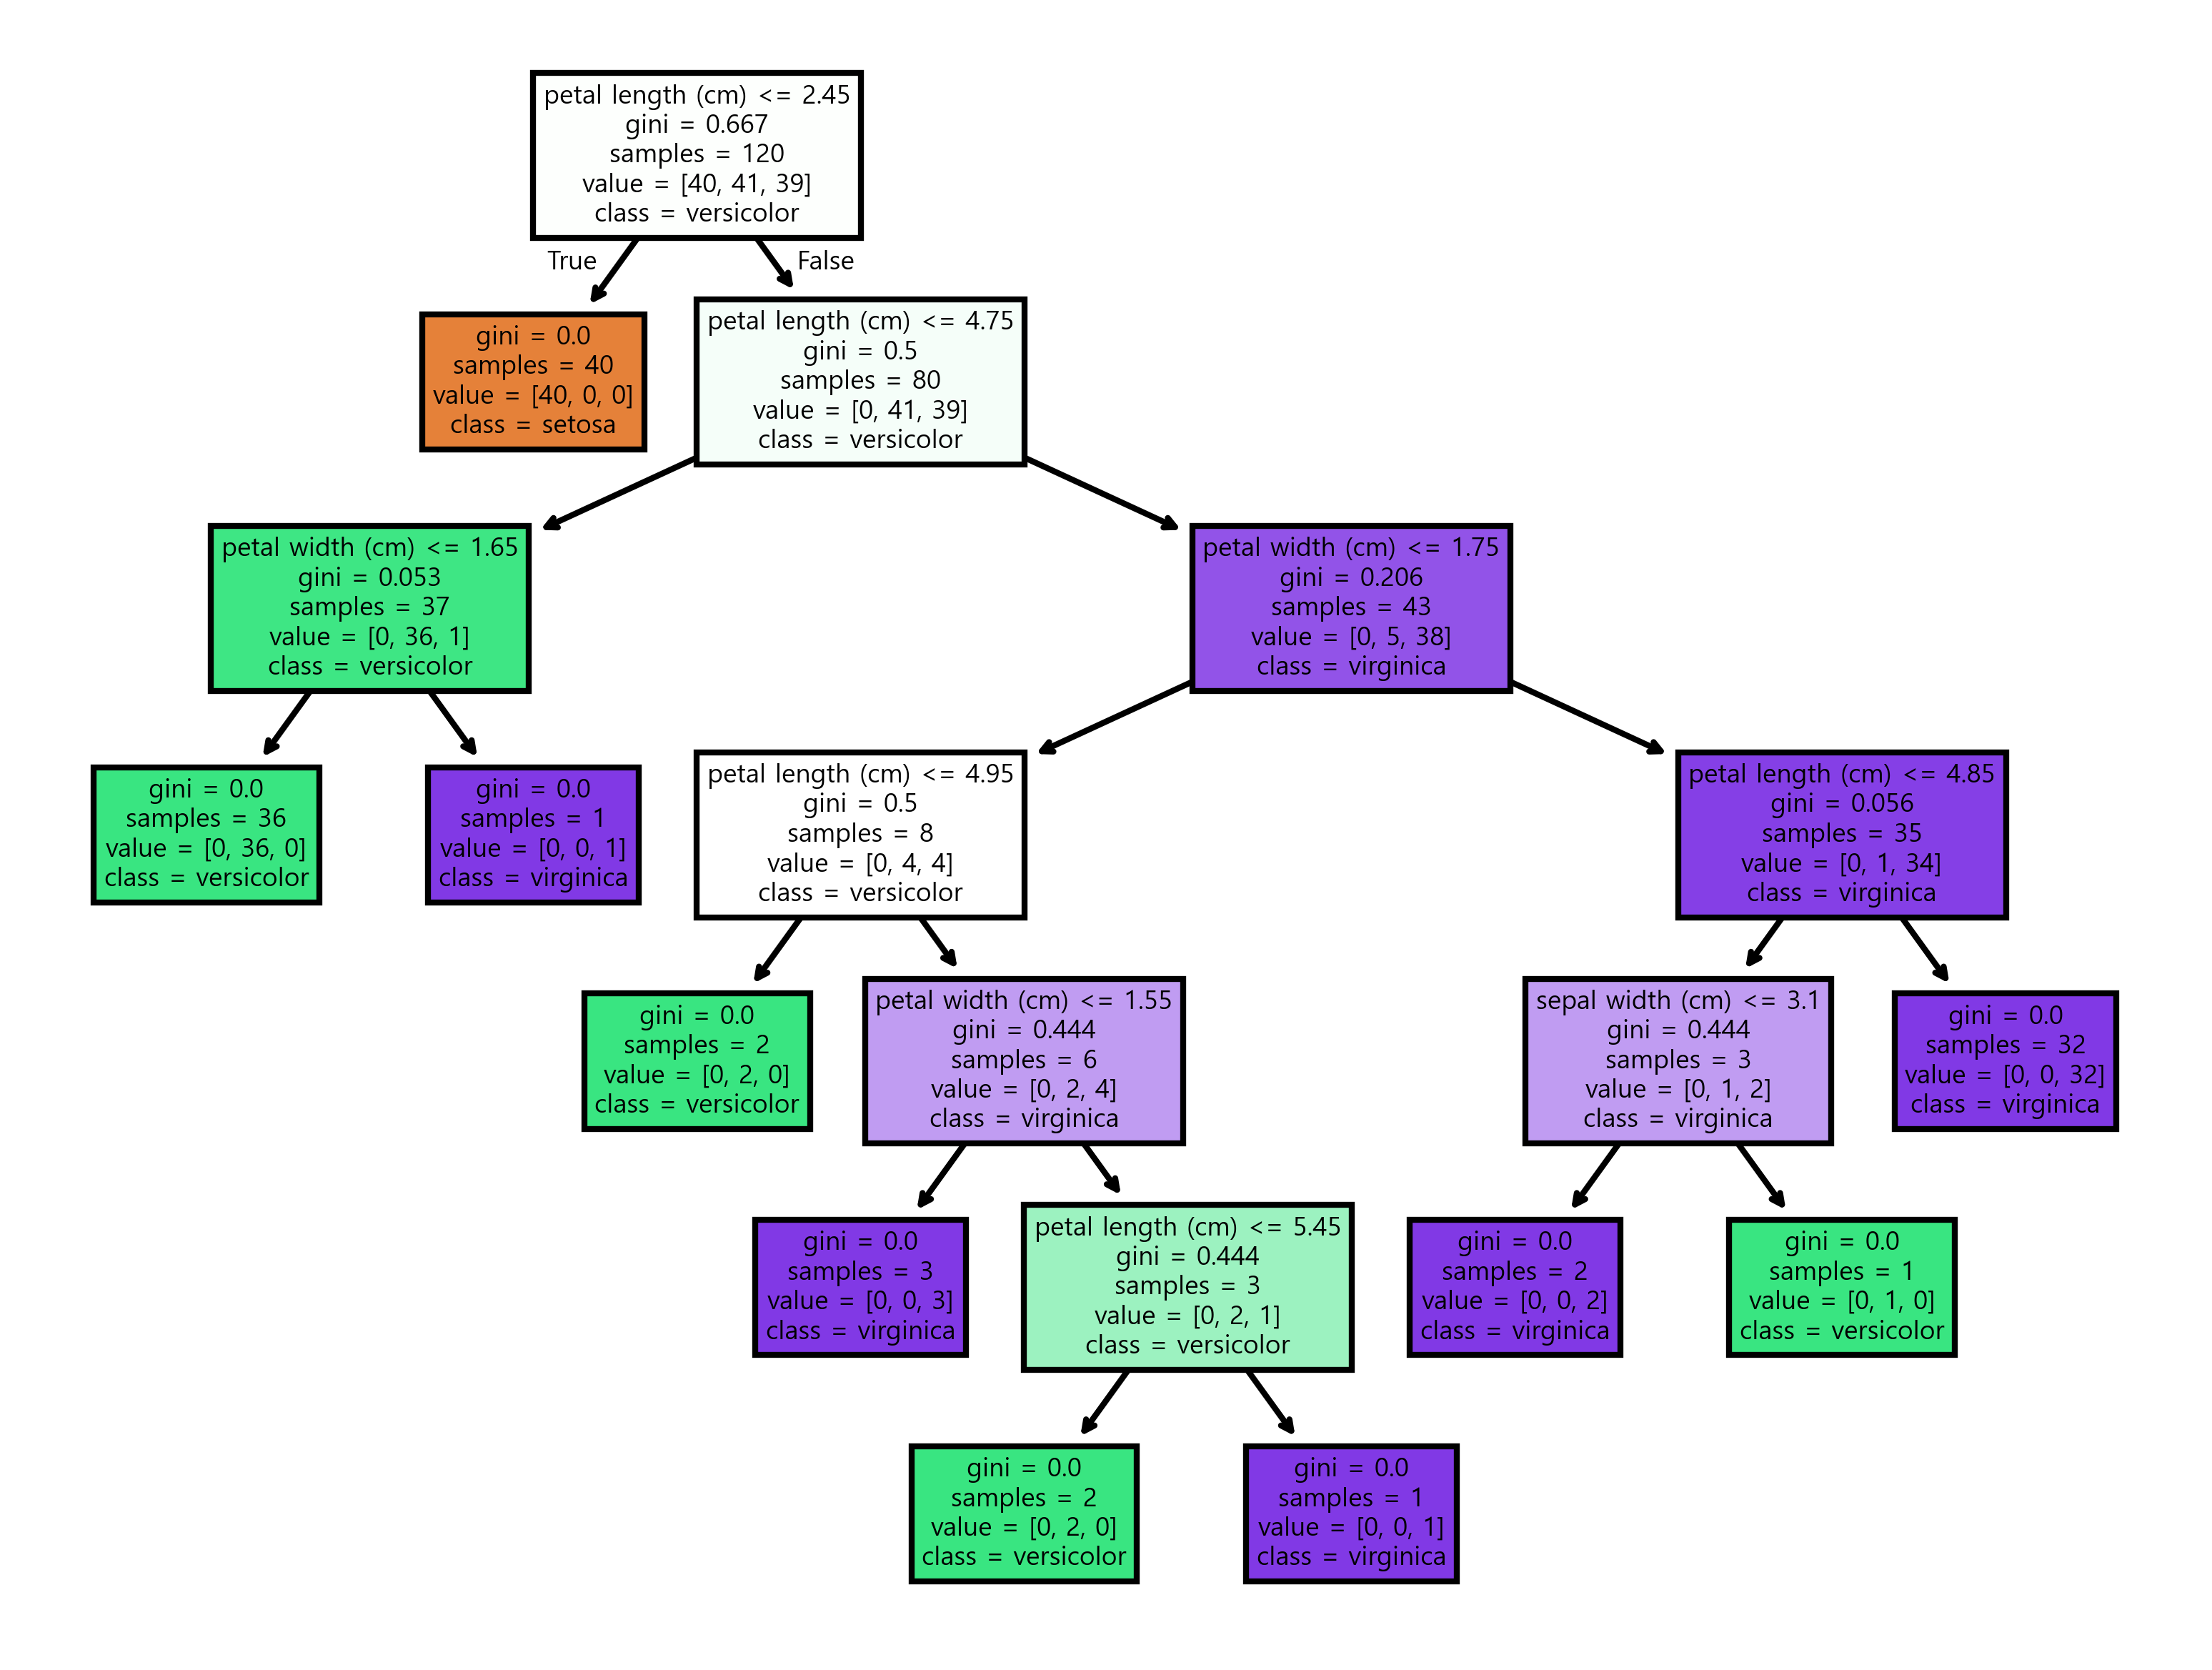

In [11]:
from sklearn.tree import plot_tree
plot_tree(dt, class_names=iris.target_names,
          feature_names=iris.feature_names,
          filled=True)
plt.show()